<a href="https://colab.research.google.com/github/RasilaMoidheensha006/Medical-Cost-Prediction/blob/main/Medical_insurance_cost_Prediction_using_Linear_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#importing file to the console
from google.colab import files
files.upload()

Saving insurance.csv to insurance (2).csv


{'insurance (2).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [ ]:
#reading file
Insurance=pd.read_csv("insurance.csv")

In [ ]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Checking for null values
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Informationa about data
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Statistical information
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Insurance.shape

(1338, 7)

<ipython-input-107-f353162c0e58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=Insurance,palette=['Grey', 'Yellow'])


Text(0.5, 1.0, 'Gender Distribution')

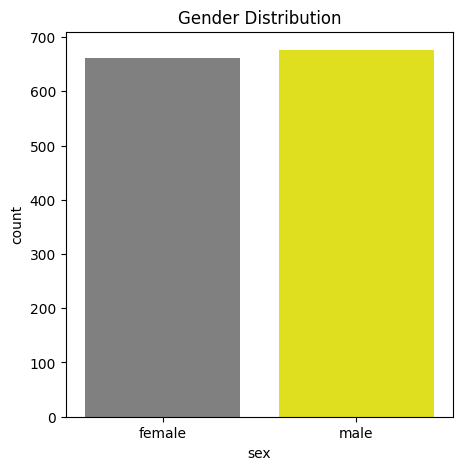

In [ ]:
#Finding Gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=Insurance,palette=['Grey', 'Yellow'])
plt.title('Gender Distribution')

<ipython-input-108-2a82fc07f315>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', palette=['Grey', 'turquoise'], data=Insurance)


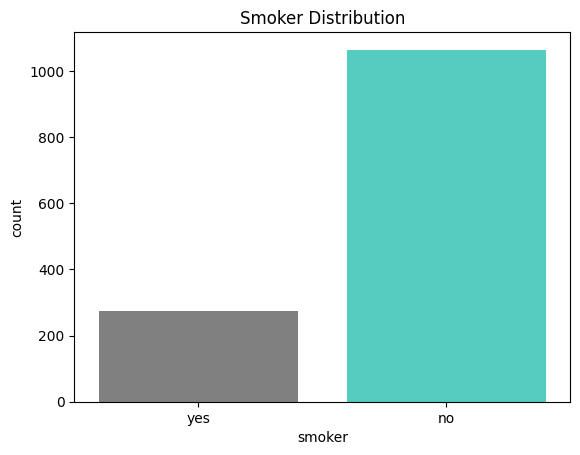

In [ ]:
# Smoker count
sns.countplot(x='smoker', palette=['Grey', 'turquoise'], data=Insurance)
plt.title('Smoker Distribution')
plt.show()

In [ ]:
Insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f16cefd0c40>,
 [Text(0.722119686055283, 0.8297850077046582, 'southeast'),
  Text(-0.8627681631663758, 0.6823716704454532, 'southwest'),
  Text(-0.7201694244483217, -0.8314782018127556, 'northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27.2%'),
  Text(-0.47060081627256856, 0.37220272933388354, '24.3%'),
  Text(-0.39281968606272083, -0.45353356462513933, '24.3%'),
  Text(0.4345937421844059, -0.41367653940506965, '24.2%')])

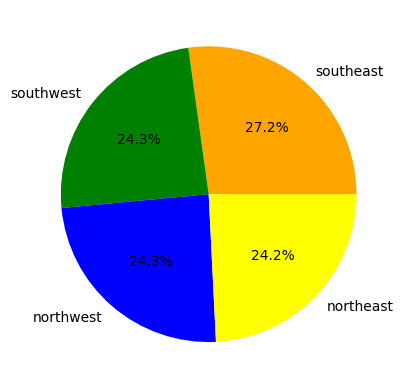

In [ ]:
#Regional Distribution
x = Insurance['region'].value_counts()
plt.pie(x, labels=("southeast", "southwest", "northwest", "northeast"), autopct="%1.1f%%", data=Insurance, colors=('Orange', 'Green', 'Blue', 'Yellow'))

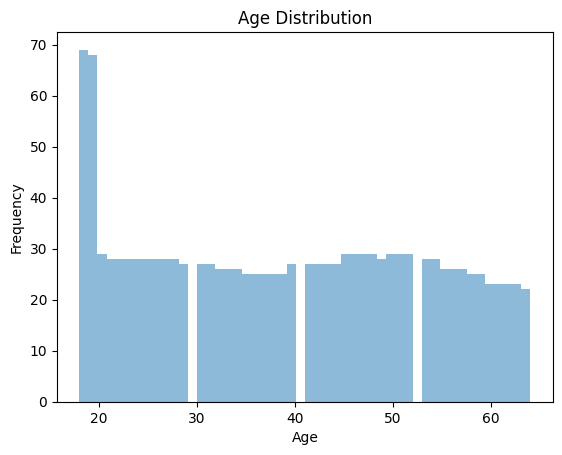

In [ ]:
plt.hist(Insurance['age'], bins=50, alpha=0.5, label='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

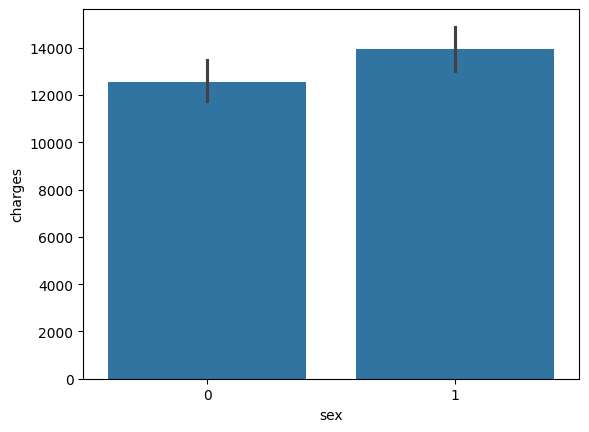

In [ ]:
sns.barplot(x='sex',y='charges',data=Insurance)

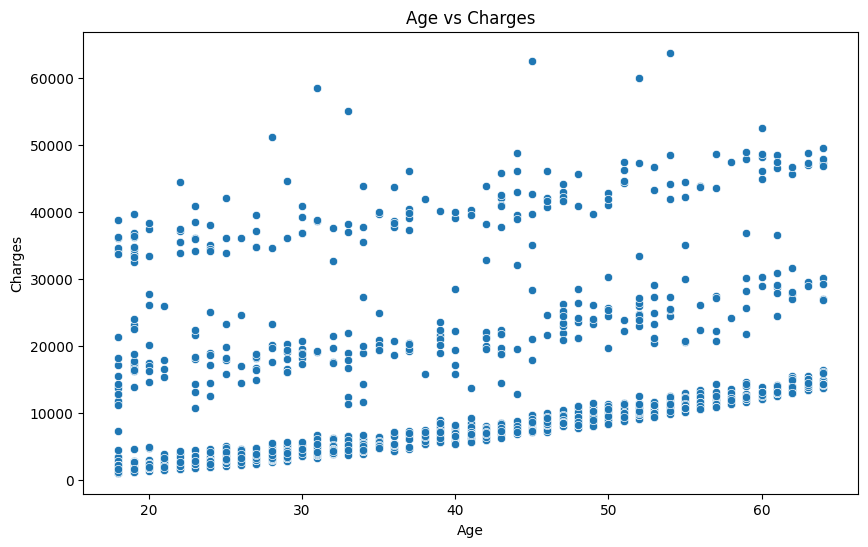

In [ ]:
#finding is there any relationship between age and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=Insurance)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

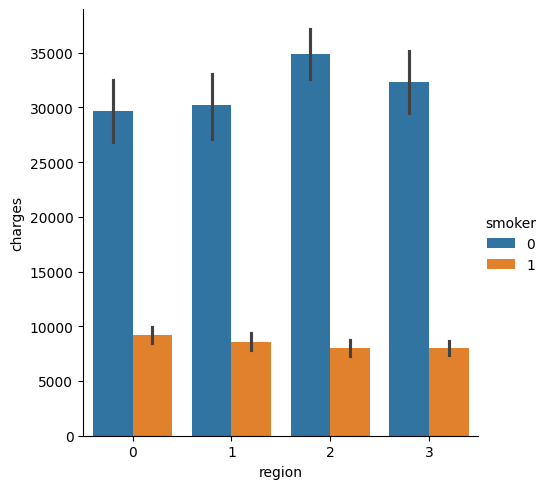

In [ ]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=Insurance)
plt.show()

In [ ]:
#Size mapping to convert Sex values into Numerical values using size mapping
size_mapping={'female':0,'male':1}
Insurance['sex']=Insurance['sex'].map(size_mapping)

In [ ]:
size_mapping={'yes':0,'no':1}
Insurance['smoker']=Insurance['smoker'].map(size_mapping)

In [ ]:
#Label Encoding for converting Region values into Numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Insurance['region']=le.fit_transform(Insurance['region'].values)

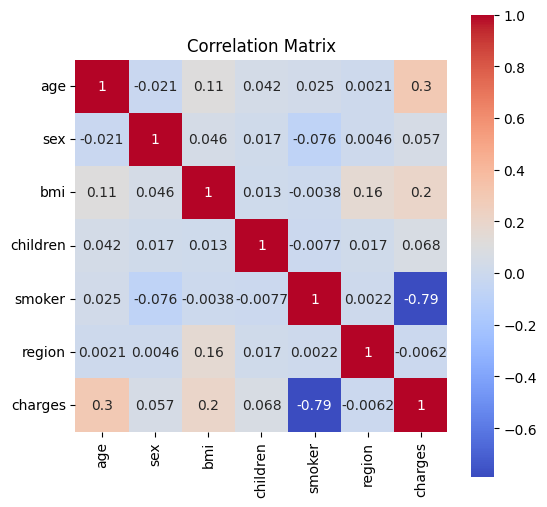

In [ ]:
#Finding the best relation which leads for charging amount
corr_matrix = Insurance.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides insights into the relationships between the different features and the output variable "charges". The strong negative correlation between "smoker" and "charges" suggests that smokers tend to have lower insurance charges, while the weak positive correlation between "age" and "charges" suggests that older individuals tend to have slightly higher insurance charges.

In [ ]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


 Store Feature Matrix In X and Response(Target) In Vector y

In [ ]:
#x is the Output Input variable and y is the output variable
x=Insurance.iloc[:,Insurance.columns!='charges']
y=Insurance.iloc[:,Insurance.columns=='charges']


Train/Test split
1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set

In [ ]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

Importing Models

Model Training

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)
pred = linreg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:

print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7694415927057693


In [ ]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

NameError: name 'plt' is not defined

Working Model on New data

In [ ]:
data = {'age':50, 'sex':0,'bmi':40.28, 'children':3,'smoker':0, 'region':3}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,40.28,3,0,3


Predicting the Medical Charges of New customer


In [ ]:
cost_pred = linreg.predict(cust_df)
print("The medical Insurance cost of the new customer is: ", cost_pred)

The medical Insurance cost of the new customer is:  [[38509.68409222]]
